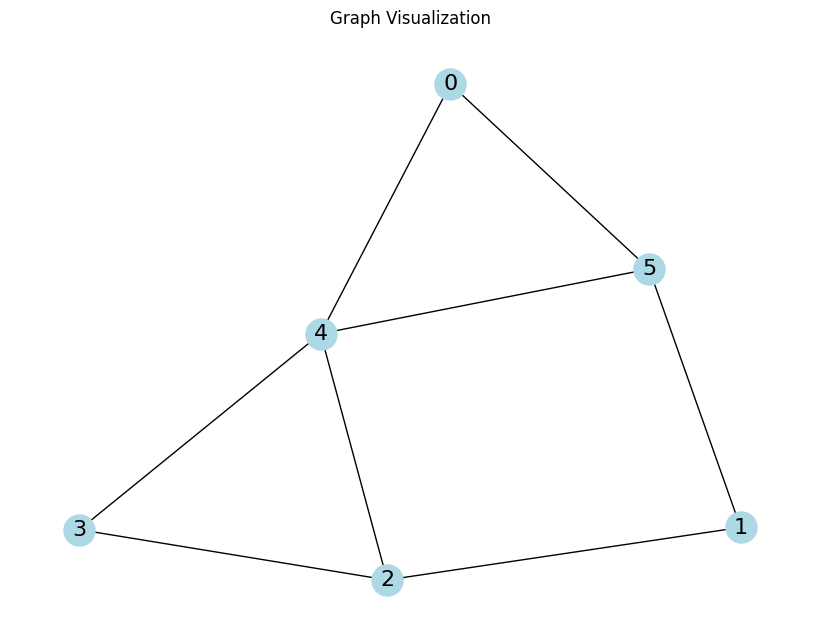

BFS traversal starting from node 0: [0, 4, 5, 2, 3, 1]
DFS traversal starting from node 0: [0, 4, 2, 1, 5, 3]


In [2]:
# Install required libraries
!pip install networkx matplotlib

# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create the graph
G = nx.Graph()

# Add nodes
nodes = [0, 1, 2, 3, 4, 5]
G.add_nodes_from(nodes)

# Add edges based on the image
edges = [
    (0, 4), (0, 5),
    (1, 2), (1, 5),
    (2, 3), (2, 4),
    (3, 4),
    (4, 5)
]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Positioning
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16)
plt.title('Graph Visualization')
plt.show()

# BFS Implementation
def bfs(graph, start):
    visited = []
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.append(node)
            queue.extend(neighbor for neighbor in graph[node] if neighbor not in visited)
    return visited

# DFS Implementation
def dfs(graph, start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

# Running BFS and DFS
start_node = 0
print(f"BFS traversal starting from node {start_node}: {bfs(G, start_node)}")
print(f"DFS traversal starting from node {start_node}: {dfs(G, start_node)}")



Processing size: 1000

Processing size: 40000

Processing size: 80000

Processing size: 200000

Processing size: 1000000

Results DataFrame:
   Data Size  BFS Time (seconds)  DFS Time (seconds)
0       1000            0.000204            0.000147
1      40000            0.010904            0.003479
2      80000            0.024477            0.007388
3     200000            0.064604            0.038263
4    1000000            0.331018            0.251956


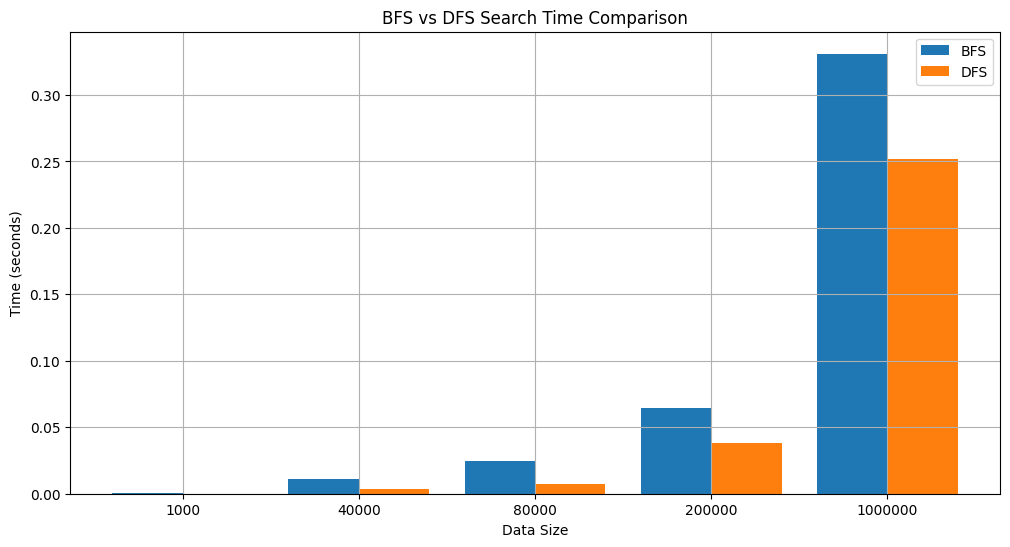

In [3]:
# Install required libraries
!pip install matplotlib pandas

# Import libraries
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

# Function to create a simple binary tree from a list
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def insert_level_order(arr, root, i, n):
    if i < n:
        temp = Node(arr[i])
        root = temp
        root.left = insert_level_order(arr, root.left, 2 * i + 1, n)
        root.right = insert_level_order(arr, root.right, 2 * i + 2, n)
    return root

# BFS search
def bfs(root, goal):
    if not root:
        return False
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node.value == goal:
            return True
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return False

# DFS search
def dfs(root, goal):
    if not root:
        return False
    stack = [root]
    while stack:
        node = stack.pop()
        if node.value == goal:
            return True
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return False

# Data Sizes
sizes = [1000, 40000, 80000, 200000, 1000000]

# Store results
results = {
    'Data Size': [],
    'BFS Time (seconds)': [],
    'DFS Time (seconds)': []
}

# Process each dataset
for size in sizes:
    print(f"\nProcessing size: {size}")

    # Generate random unique numbers
    data = random.sample(range(size*10), size)  # Multiply by 10 to ensure uniqueness

    # Build the tree
    root = insert_level_order(data, None, 0, len(data))

    # Define goal
    goal = data[-220]

    # BFS timing
    start_time = time.time()
    bfs(root, goal)
    bfs_time = time.time() - start_time

    # DFS timing
    start_time = time.time()
    dfs(root, goal)
    dfs_time = time.time() - start_time

    # Save the results
    results['Data Size'].append(size)
    results['BFS Time (seconds)'].append(bfs_time)
    results['DFS Time (seconds)'].append(dfs_time)

# Create DataFrame
df = pd.DataFrame(results)
print("\nResults DataFrame:")
print(df)

# Plotting
plt.figure(figsize=(12,6))
x_labels = [str(size) for size in sizes]

x = range(len(sizes))
bfs_times = df['BFS Time (seconds)']
dfs_times = df['DFS Time (seconds)']

plt.bar(x, bfs_times, width=0.4, label='BFS', align='center')
plt.bar([i + 0.4 for i in x], dfs_times, width=0.4, label='DFS', align='center')
plt.xlabel('Data Size')
plt.ylabel('Time (seconds)')
plt.title('BFS vs DFS Search Time Comparison')
plt.xticks([i + 0.2 for i in x], x_labels)
plt.legend()
plt.grid(True)
plt.show()


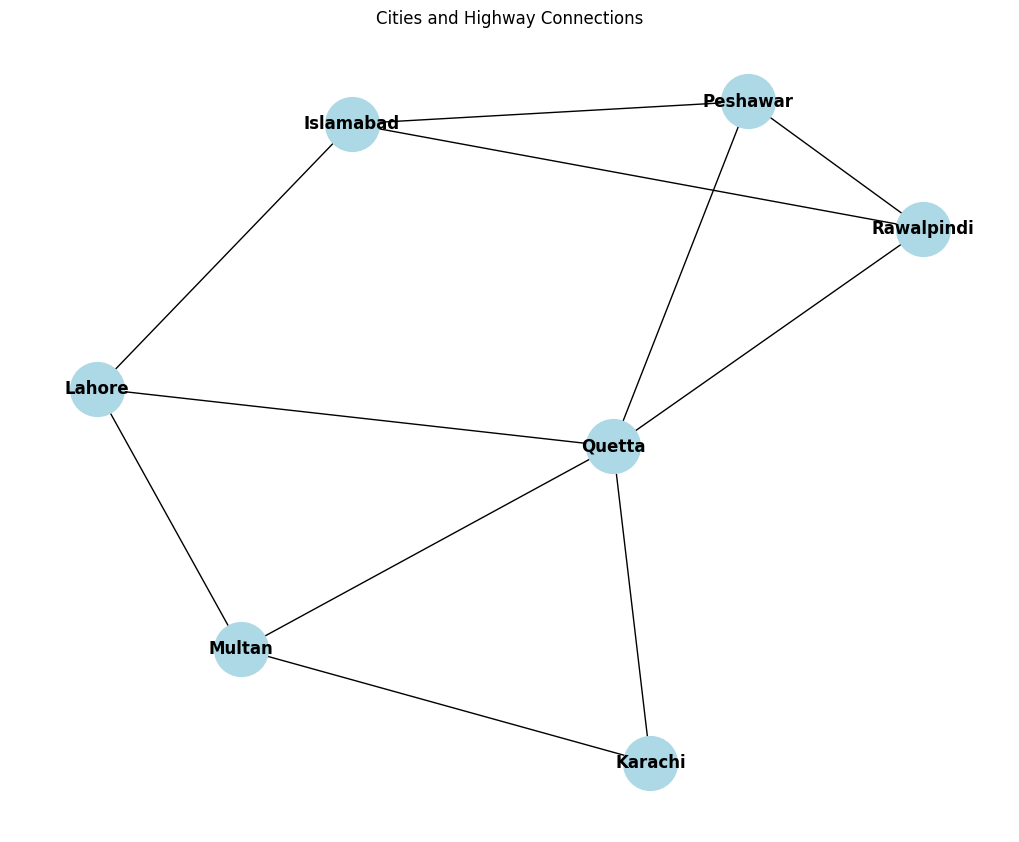

Shortest path from Islamabad to Karachi:
Islamabad -> Rawalpindi -> Quetta -> Karachi
Number of cities traveled (including start and goal): 4


In [4]:
# Install necessary libraries
!pip install networkx matplotlib

# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create the graph
G = nx.Graph()

# Define the cities and connections
connections = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# Add edges to the graph
for city, neighbors in connections.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Position layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12, font_weight='bold')
plt.title('Cities and Highway Connections')
plt.show()

# BFS to find the shortest path
def bfs_shortest_path(graph, start, goal):
    visited = set()
    queue = deque([[start]])

    if start == goal:
        return [start]

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            neighbors = graph[node]

            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path

            visited.add(node)

    return None

# Define start and goal cities
start_city = 'Islamabad'
goal_city = 'Karachi'

# Find the shortest path
shortest_path = bfs_shortest_path(connections, start_city, goal_city)

# Display results
if shortest_path:
    print(f"Shortest path from {start_city} to {goal_city}:")
    print(" -> ".join(shortest_path))
    print(f"Number of cities traveled (including start and goal): {len(shortest_path)}")
else:
    print(f"No path found from {start_city} to {goal_city}.")
